# Project: Explore Weather Trends

## Outline of steps

**What tools did you use for each step? (Python, SQL, Excel, etc)?**

- SQL was used for extracting the data from the database.
- Python was then used to analyze the data.

**How did you calculate the moving average?**

- The moving average was calculated based on pandas rolling window calculations pd.rolling().

**What were your key considerations when deciding how to visualize the trends?**

- The key consideration was that a plot was to best way to get first insights into the data.
- Thereby, the trends became clear as well, but could not be compared well due to the very similar curvatures and the different scales.
- To overcome this problem, the moving averages were scaled.
- Then, a trend line which is well comparable was plotted.

## 1. Extract the data from the database

**SQL query used to extract the data:**

- Select * from city_list
- Select * from city_data where city = 'Munich'
- Select * from global_data

**Import libraries**

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

## 2. Open up the CSV

In [19]:
city_data = pd.read_csv('city_data.csv')
global_data = pd.read_csv('global_data.csv')

In [20]:
city_data[:5]

,year,city,country,avg_temp
0,1743,Munich,Germany,1.32
1,1744,Munich,Germany,6.09
2,1745,Munich,Germany,-2.15
3,1746,Munich,Germany,NaN
4,1747,Munich,Germany,NaN


## 3. Create a line chart

**Calculate moving average**

In [21]:
for data in (city_data, global_data):
    data['moving_avg_40'] = data['avg_temp'].rolling(40).mean()

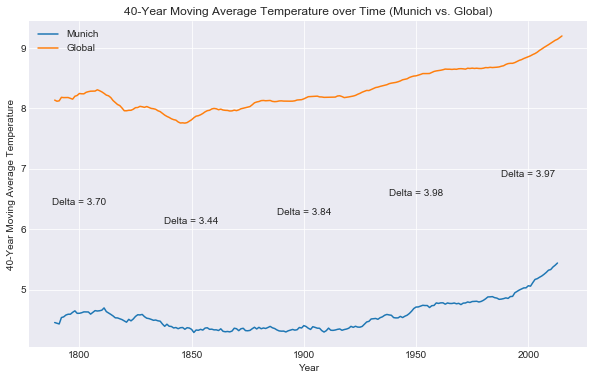

In [22]:
for dataset in (city_data, global_data):
    dataset['difference'] = global_data['moving_avg_40'] - city_data['moving_avg_40']
    
plt.figure(figsize=(10,6))
plt.style.use('seaborn-darkgrid')
for data in (city_data, global_data):
    plt.plot(data['year'], data['moving_avg_40'])
plt.title('40-Year Moving Average Temperature over Time (Munich vs. Global)'), plt.xlabel('Year'), plt.ylabel('40-Year Moving Average Temperature'), plt.legend(['Munich', 'Global'])
for i, v in enumerate(global_data['difference']):
    if i == 50 or i == 100 or i == 150 or i == 200 or i == 250:
        plt.text(data.loc[i, 'year'], (global_data.loc[i, 'moving_avg_40'] + city_data.loc[i, 'moving_avg_40']) / 2,
                 'Delta = {}'.format(str('%.2f' % v)), fontsize=10, ha='center')
plt.show()

**Scale moving average to compare trend line**

In [23]:
for dataset in (city_data, global_data):
    dataset['moving_avg_40_scaled'] = MinMaxScaler().fit_transform(dataset[['moving_avg_40']])

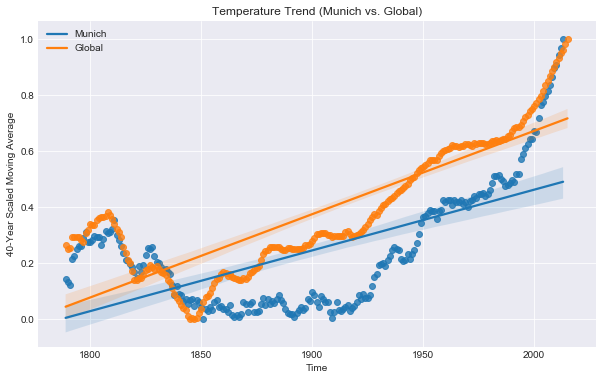

In [24]:
plt.figure(figsize=(10,6))
sns.regplot(x="year", y="moving_avg_40_scaled", data=city_data)
sns.regplot(x="year", y="moving_avg_40_scaled", data=global_data)
plt.legend(['Munich', 'Global']), plt.title('Temperature Trend (Munich vs. Global)'), plt.xlabel('Time'), plt.ylabel('40-Year Scaled Moving Average')
plt.show()

## 4. Make observations

**Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?**

See '40-Year Moving Average Temperature (Munich vs. Global)':

- Munich is cooler on average compared to the global average.
- The difference has been constant over time.

**What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?**

See 'Temperature Trend (Munich vs. Global)':

- There is a positive trend for Munich and globally. The world is getting hotter.
- The trend, both for Munich and the world, has not been consistent over the last few hundred years: The global minimum average temperature was in about 1850. The temperature increase has accelerated since about 1990.

**How do the changes in your city’s temperatures over time compare to the changes in the global average?**

See 'Temperature Trend (Munich vs. Global)':

- The global temperature increased at a higher rate than the temperature in Munich.